## Random Forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Exploratory Data Analysis (EDA):
- Perform exploratory data analysis to understand the structure of the dataset.
- Check for missing values, outliers, inconsistencies in the data.

In [2]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')
df.shape

(214, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
## checking for null values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
## checking for duplicates
df.duplicated().sum()

np.int64(1)

In [7]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## 2: Data Visualization:

- Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
- Analyze any patterns or correlations observed in the data.


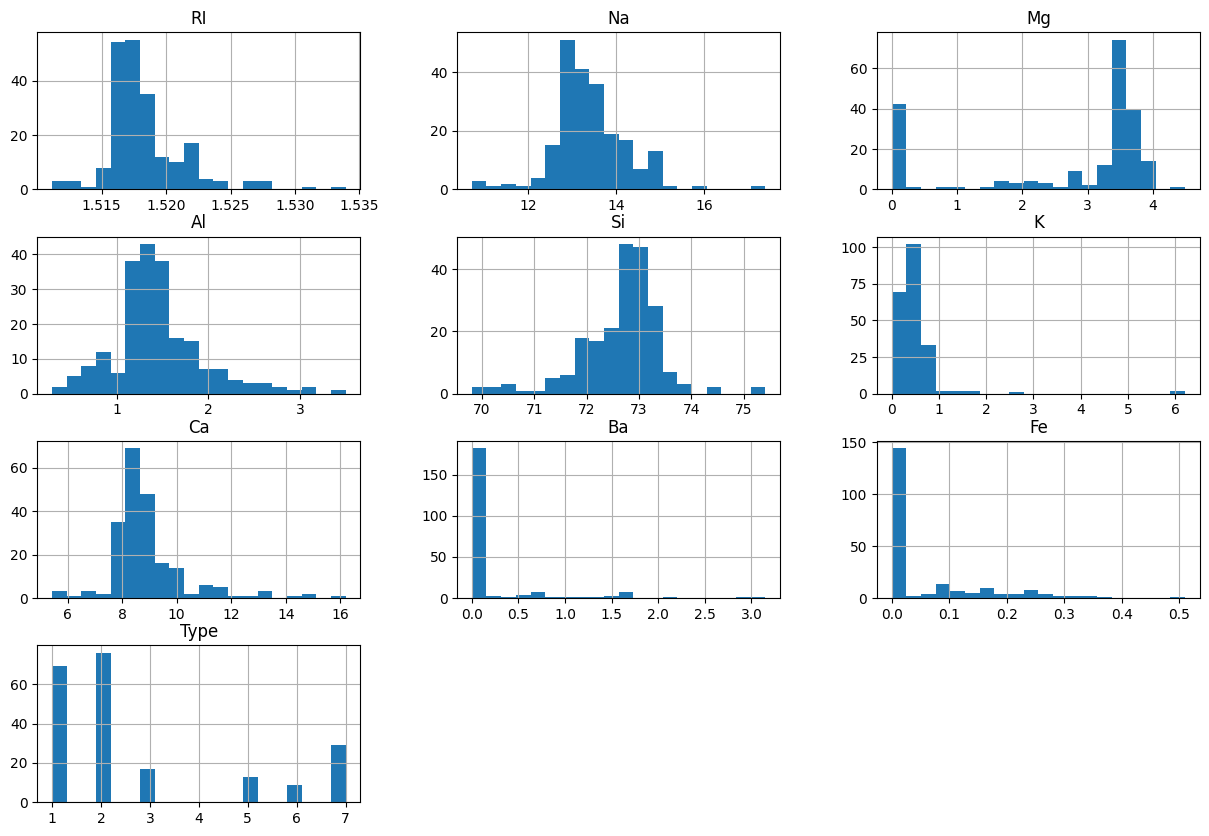

In [9]:
## Ploting Histogram
df.hist(bins=20,figsize=(15,10))
plt.show()

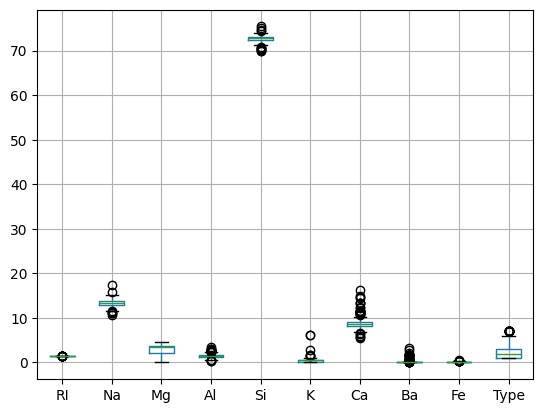

In [10]:
## box plot to check for outliers
df.boxplot()
plt.show()

In [11]:
#removing outliers

def outlier_cappin(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extrem=Q1-1.5*IQR
    upper_extrem=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extrem if x<lower_extrem else upper_extrem if x>upper_extrem else x)


for col in df.select_dtypes(['int','float']).columns:
    outlier_cappin(df,col)

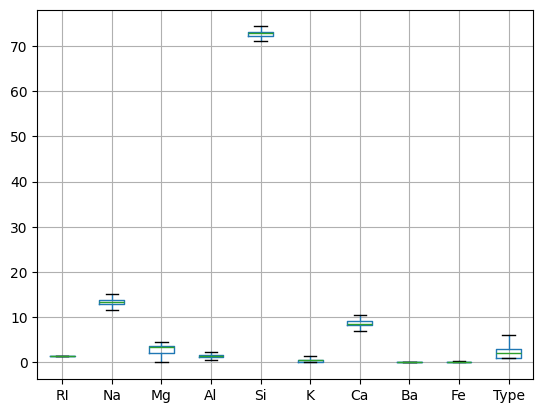

In [12]:
df.boxplot()
plt.show()

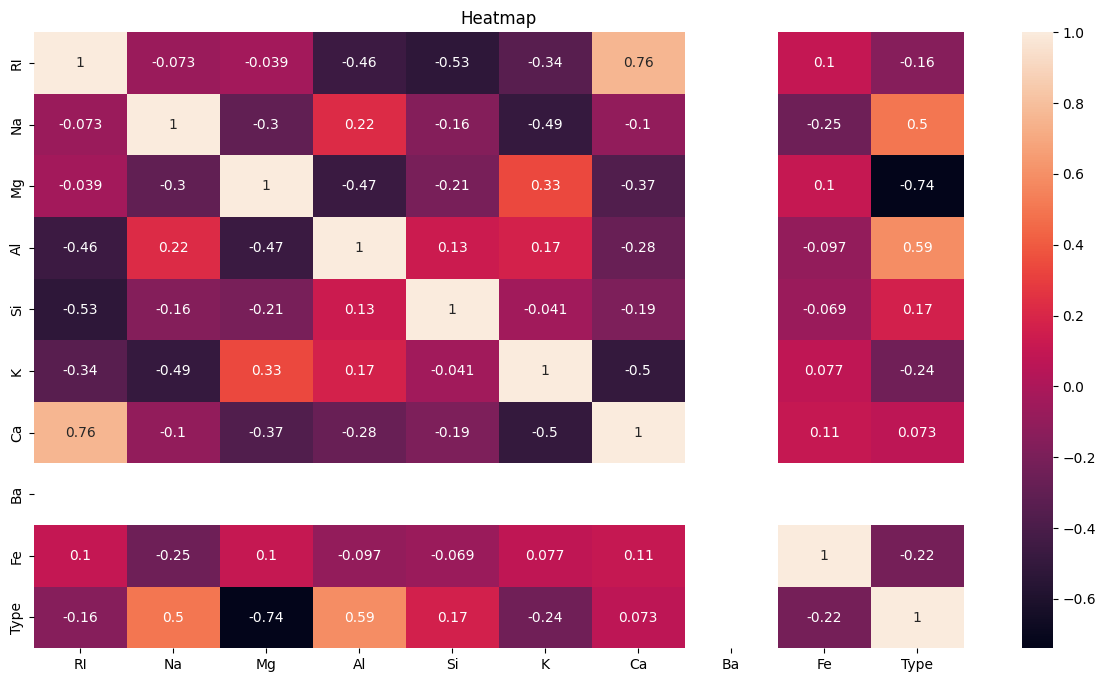

In [13]:
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
plt.title("Heatmap")
plt.show()

## 3: Data Preprocessing

- 1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
- 2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
- 3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


In [14]:
## Checking for missing values in the dataset

df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [15]:
# Checking for categorical column
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

## 4: Random Forest Model Implementation
- 1. Divide the data into train and test split.
- 2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
- 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


In [16]:
# defining features and target
features=df.drop('Type',axis=1)
target=df['Type']
print(features)
print(target)

          RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
..       ...    ...   ...   ...    ...   ...   ...  ...  ...
208  1.51623  14.14  0.00  2.29  72.61  0.08  9.18  0.0  0.0
209  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  0.0  0.0
210  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  0.0  0.0
211  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  0.0  0.0
212  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  0.0  0.0

[213 rows x 9 columns]
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
208    6.0
209    6.0
210    6.0
211    6.0
212    6.0
Name: Type, Length: 213, dtype: float64


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [18]:
## spliting the into train and test

x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=42)
print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())


          RI     Na    Mg    Al      Si     K      Ca   Ba    Fe
173  1.52058  12.85  1.61  2.17  72.180  0.76   9.700  0.0  0.25
137  1.51674  12.79  3.52  1.54  73.360  0.66   7.900  0.0  0.00
65   1.52152  13.05  3.65  0.87  72.220  0.19   9.850  0.0  0.17
108  1.51818  13.72  0.00  0.56  74.305  0.00  10.515  0.0  0.00
181  1.51916  14.15  0.00  2.09  72.740  0.00  10.515  0.0  0.00
          RI     Na    Mg    Al     Si     K    Ca   Ba    Fe
9    1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11
197  1.51531  14.38  0.00  2.29  73.10  0.04  9.08  0.0  0.00
66   1.52152  13.05  3.65  0.87  72.32  0.19  9.85  0.0  0.17
191  1.51623  14.20  0.00  2.29  73.46  0.04  9.04  0.0  0.09
117  1.51673  13.30  3.64  1.53  72.53  0.65  8.03  0.0  0.25
173    5.0
137    2.0
65     1.0
108    2.0
181    6.0
Name: Type, dtype: float64
9      1.0
197    6.0
66     1.0
191    6.0
117    2.0
Name: Type, dtype: float64


In [19]:
#Random Forest
rand_for=RandomForestClassifier(n_estimators=50,max_features=3)
rand_for.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=50)

In [20]:
y_pred=rand_for.predict(x_test)
y_pred

array([1., 6., 1., 6., 2., 2., 1., 2., 2., 1., 6., 5., 2., 2., 6., 5., 6.,
       1., 1., 2., 1., 6., 6., 6., 3., 5., 1., 1., 6., 1., 2., 2., 3., 2.,
       2., 6., 5., 3., 2., 2., 1., 2., 1., 2., 1., 2., 5., 2., 5., 2., 1.,
       1., 1., 2., 1., 2., 2., 1., 5., 1., 2., 1., 1., 6.])

In [21]:
# printing classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.71      0.83      0.77        18
         2.0       0.73      0.67      0.70        24
         3.0       1.00      0.75      0.86         4
         5.0       0.57      1.00      0.73         4
         6.0       1.00      0.79      0.88        14

    accuracy                           0.77        64
   macro avg       0.80      0.81      0.79        64
weighted avg       0.79      0.77      0.77        64



## 5: Bagging and Boosting Methods



## Bagging

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt=DecisionTreeClassifier()

In [24]:
#applying Bagging method using Decision Tree Classifier
model=BaggingClassifier(dt,n_estimators=40)

In [25]:
model.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=40)

In [26]:
y_preds=model.predict(x_test)
y_preds

array([1., 6., 1., 6., 2., 2., 1., 2., 2., 1., 2., 5., 2., 2., 6., 5., 6.,
       1., 1., 2., 1., 6., 6., 6., 2., 5., 1., 1., 6., 1., 1., 2., 3., 2.,
       2., 6., 5., 1., 2., 2., 1., 2., 1., 2., 1., 2., 5., 1., 5., 2., 1.,
       1., 1., 2., 1., 2., 2., 1., 5., 1., 2., 1., 1., 6.])

In [27]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         1.0       0.67      0.89      0.76        18
         2.0       0.68      0.62      0.65        24
         3.0       1.00      0.25      0.40         4
         5.0       0.57      1.00      0.73         4
         6.0       1.00      0.71      0.83        14

    accuracy                           0.72        64
   macro avg       0.78      0.70      0.67        64
weighted avg       0.76      0.72      0.71        64



## Boosting

In [28]:
from sklearn.ensemble import AdaBoostClassifier

base_estimator=DecisionTreeClassifier()

In [29]:
#Applying Adaboost Classifier
model2=AdaBoostClassifier(base_estimator,n_estimators=40)

In [30]:
model2.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=40)

In [31]:
y_pred=model2.predict(x_test)
y_pred

array([1., 6., 1., 6., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 6., 5., 6.,
       2., 1., 1., 1., 6., 6., 6., 2., 5., 1., 1., 6., 1., 1., 2., 3., 2.,
       2., 6., 2., 3., 2., 2., 3., 2., 1., 2., 1., 2., 5., 1., 6., 2., 1.,
       1., 6., 2., 1., 2., 2., 1., 5., 3., 1., 2., 1., 6.])

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.67      0.78      0.72        18
         2.0       0.65      0.62      0.64        24
         3.0       0.50      0.50      0.50         4
         5.0       0.50      0.50      0.50         4
         6.0       0.83      0.71      0.77        14

    accuracy                           0.67        64
   macro avg       0.63      0.62      0.63        64
weighted avg       0.68      0.67      0.67        64



## Additional Notes:
## 1. Explain Bagging and Boosting methods. How is it different from each other.

- Bagging: It is a homogeneous weak learners’ model that learns from each other independently in parallel and combines them for determining the model average.

- Boosting: It is also a homogeneous weak learners’ model but works differently from Bagging. 
- In this model, learners learn sequentially and adaptively to improve model predictions of a learning algorithm.

## 2. Explain how to handle imbalance in the data.

- Oversampling techniques such as SMOTE can increase the minority class samples by generating synthetic data, helping the model learn better.
- Undersampling reduces the majority class size to create a balanced dataset but may lead to information loss.
- Another effective approach is using algorithm-level techniques like class weights, where higher importance is assigned to minority classes without modifying the dataset.